# Flight Price Prediction

# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

# FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import xgboost 
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')
train['type']='train'
test['type']='test'

- Since data is in form of excel file we have to use pandas read_excel to load the data

In [3]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,train
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,train
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,train
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,train
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,train


In [4]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,type
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,test
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,test
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,test
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,test
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,test


- We have imported the necessary libraries and successfully loaded both test and train data set.
- Now lets understand the data set in detail. 

# Exploratory Data Analysis(EDA)

- Firstly to understand about the dataset, we should know how much data is there in the dataset. 
- Instead of analysing the data of the train and test dataset seperately, we can do it together by concatinating both the datasets and doing the analysis in a single run.
- Later we will seperate it and do the model testing individually. 

In [5]:
df_flight=pd.concat([train,test])
df_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


- We have successfully combined both the datasets and now we have total of 13354 rows and 12 columns (including the target variable).

In [6]:
# Checking the dimensions of this dataset.
test.shape, train.shape

((2671, 11), (10683, 12))

In the Test dataset:-
- Test set has 2671 rows less then train set and 10 cols.
- Target col price is not available in this data set.

In the Train dataset:-
- Test set has 10683 rows less then train set and 11 cols.
- Target col price is available in this data set.

In [7]:
#Resetting the index inorder to make our data clean and easier to understand
df_flight.reset_index(drop=True,inplace=True)

- Since we have combined both the datasets, the index of the both the datasets are different. 
- So we have reset the index for more clarity.

In [8]:
#Lets confirm the index is reset or not 
df_flight.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN,test


In [9]:
# Checking the dimensions of this dataset.
df_flight.shape

(13354, 12)

- We have total of 13354 rows and 12 columns (including the target variable).

In [10]:
# checkng the columns present in the dataset.
df_flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'type'],
      dtype='object')

- No space is seen in the column nomenclature.

In [11]:
#Checking datatypes
df_flight.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
type                object
dtype: object

- As we can see all the columns dataset are object type except price column that is float.
- We have to make the required changes before proceeding to the next phase. 

In [12]:
# For getting the overview of the dataset
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  type             13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.2+ MB


- As we can see datasets shows all object type variables except the target variable.
- We can see some missing datas are also there, lets confirm that.

In [13]:
#Checking for null values
df_flight.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
type                  0
dtype: int64

- From above we can see that the Route and Total_Stops column has 1 NA value each, so lets replace it with max values.

In [14]:
df_flight['Route'].fillna(df_flight['Route'].value_counts().idxmax(),inplace=True)
df_flight['Total_Stops'].fillna(df_flight['Total_Stops'].value_counts().idxmax(),inplace=True)

In [15]:
# Re-Checking for null values
df_flight.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
type                  0
dtype: int64

- Now we have no null or missing values.

- Changing the formate of 'Date_of_Journey' to simplify for easy understanding.

In [16]:
df_flight['year'] = pd.DatetimeIndex(df_flight['Date_of_Journey']).year
df_flight['month'] = pd.DatetimeIndex(df_flight['Date_of_Journey']).month
df_flight['day'] = pd.DatetimeIndex(df_flight['Date_of_Journey']).day
df_flight.drop(['Date_of_Journey'],axis=1,inplace=True)

In [17]:
#Changing hours,minutes format to minutes and hours
df_flight['Duration']=  df_flight['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df_flight['Duration']=df_flight['Duration']/60
pd.options.display.float_format = '{:.2f}'.format

In [18]:
# lets confirm the dataset
df_flight

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,year,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2.83,non-stop,No info,3897.00,train,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2 stops,No info,7662.00,train,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2 stops,No info,13882.00,train,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1 stop,No info,6218.00,train,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1 stop,No info,13302.00,train,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23.92,1 stop,No info,NaN,test,2019,6,6
13350,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2.58,non-stop,No info,NaN,test,2019,3,27
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6.58,1 stop,No info,NaN,test,2019,6,3
13352,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15.25,1 stop,No info,NaN,test,2019,6,3


In [19]:
#Checking uniques of object datatypes columns to improve EDA
for col in df_flight.columns:
    if df_flight[col].dtype=="object":
        print(df_flight[col].value_counts())
        print()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                3001
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ..

- The year column is having only one value, lets confirm it.

In [20]:
df_flight["year"].value_counts()

2019    13354
Name: year, dtype: int64

- The year column is having only one value that is 2019, lets drop it as it may not effect over model testing.

In [21]:
df_flight.drop(['year'],axis=1,inplace=True)

- Some values are repeated or need some adjustment so it will be easy to analyse.

In [22]:
#Corecting some unique values in these object data
df_flight["Destination"].replace("New Delhi","Delhi",inplace=True)
df_flight["Additional_Info"].replace("No Info","No info",inplace=True)

In [23]:
df_flight["Destination"].value_counts()

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

- As we can see the count of "Delhi" has changed.

In [24]:
df_flight["Additional_Info"].value_counts()

No info                         10496
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
2 Long layover                      1
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

- As we can see the count of "No info" has changed.

In [25]:
df_flight["Total_Stops"].replace("non-stop","0 stop",inplace=True)
df_flight["Total_Stops"]=df_flight["Total_Stops"].str.strip("stop")
df_flight["Total_Stops"].value_counts()

1     7057
0     4340
2     1899
3       56
4        2
Name: Total_Stops, dtype: int64

- As we can see the "Total_Stops" column has changed into simplified formate. 

In [26]:
# lets confirm the dataset
df_flight

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,month,day
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2.83,0,No info,3897.00,train,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2,No info,7662.00,train,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2,No info,13882.00,train,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1,No info,6218.00,train,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1,No info,13302.00,train,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23.92,1,No info,NaN,test,6,6
13350,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2.58,0,No info,NaN,test,3,27
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6.58,1,No info,NaN,test,6,3
13352,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15.25,1,No info,NaN,test,6,3


- Splitting the dataset into numeric and non-numeric or object type so that analysis will be easy.

In [27]:
numerics_var = ['float64', 'int64']
numeric_df = df_flight.select_dtypes(include=numerics_var)
objects_df = df_flight.select_dtypes(exclude=numerics_var) 

In [28]:
objects_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,type
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,train
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,train
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,train
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,train
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,train
...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,1,No info,test
13350,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,0,No info,test
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,1,No info,test
13352,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,1,No info,test


In [29]:
objects_df.describe()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,type
count,13354,13354,13354,13354,13354,13354,13354,13354,13354
unique,12,5,5,132,223,1451,5,9,2
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,1,No info,train
freq,4746,5682,5682,3001,288,536,7057,10496,10683


- There are 12 Airlines operator where Jet Airways freq used is highest.
- The most route trafic is from DEL-BOM_COK which tops the counts.
- The datset shows highest Destination count is Cochin and highest Source count is Delhi.

In [30]:
numeric_df

,Duration,Price,month,day
0,2.83,3897.00,3,24
1,7.42,7662.00,1,5
2,19.00,13882.00,9,6
3,5.42,6218.00,12,5
4,4.75,13302.00,1,3
...,...,...,...,...
13349,23.92,NaN,6,6
13350,2.58,NaN,3,27
13351,6.58,NaN,6,3
13352,15.25,NaN,6,3


In [31]:
numeric_df.describe()

,Duration,Price,month,day
count,13354.00,10683.00,13354.00,13354.00
mean,10.71,9087.06,5.55,12.55
std,8.45,4611.36,3.00,8.76
min,0.08,1759.00,1.00,3.00
25%,2.92,5277.00,3.00,5.00
50%,8.67,8372.00,5.00,6.00
75%,15.50,12373.00,6.00,21.00
max,47.67,79512.00,12.00,27.00


# Data Visualization

In [32]:
df_flight['Price'].value_counts()

10262.00    258
10844.00    212
7229.00     162
4804.00     160
4823.00     131
           ... 
13100.00      1
7904.00       1
5969.00       1
9359.00       1
15407.00      1
Name: Price, Length: 1870, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

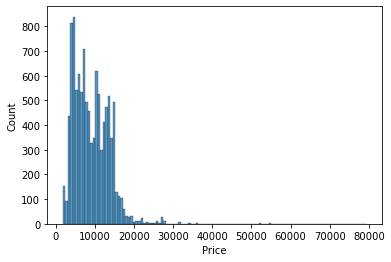

In [33]:
# Visualizing the Histogram of the Target Variable
sns.histplot(df_flight['Price'])

- Most of the ticket price count is between 6000 INR to 15000INR. 

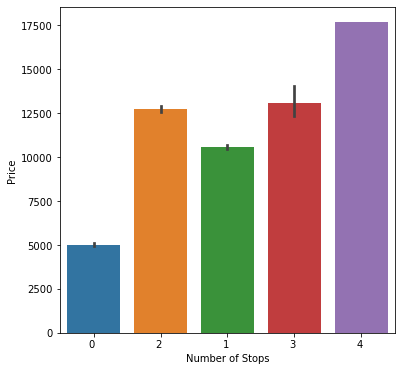

In [34]:
plt.figure(figsize=(6,6))
sns.barplot(x="Total_Stops",y="Price",data=df_flight)
plt.xlabel('Number of Stops')
plt.show()

- Price is more with more number of stops.

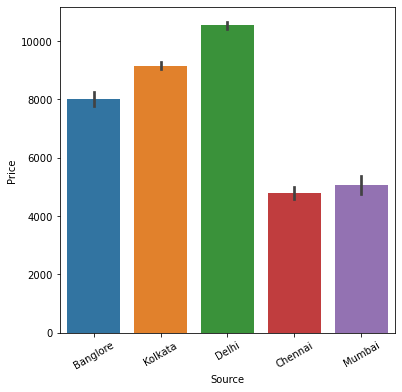

In [35]:
plt.figure(figsize=(6,6))
sns.barplot(x="Source",y="Price",data=df_flight)
plt.xticks(rotation=30)
plt.show()

- Price of ticket is more from Delhi as source comparing others.

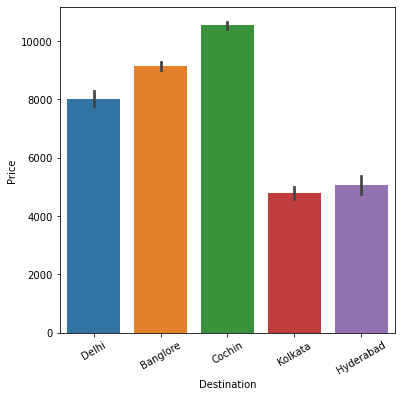

In [36]:
plt.figure(figsize=(6,6))
sns.barplot(x="Destination",y="Price",data=df_flight)
plt.xticks(rotation=30)
plt.show()

- Price is more to Cochin as destination compared to others.

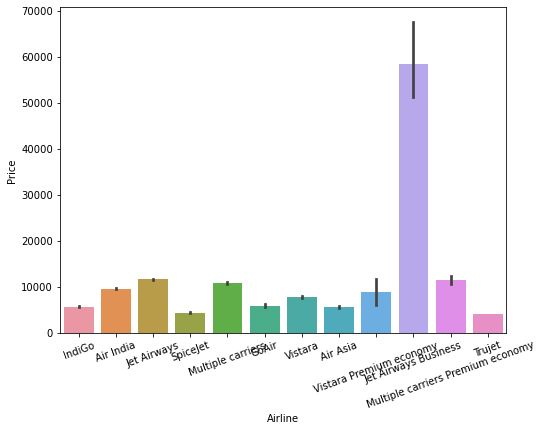

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x="Airline",y="Price",data=df_flight)
plt.xticks(rotation=20)
plt.show()

- Price of Jet Airways Business airline is more than other airlines.

In [38]:
pd.pivot_table(df_flight,index=['Airline'],values='Price',aggfunc=[np.mean,np.median,min,max])

,mean,median,min,max
,Price,Price,Price,Price
Airline,,,,
Air Asia,5590.26,5162.00,3383.00,13774.00
Air India,9611.21,9443.00,2050.00,31945.00
GoAir,5861.06,5135.00,3398.00,22794.00
IndiGo,5673.68,5000.00,2227.00,22153.00
Jet Airways,11643.92,11467.00,1840.00,54826.00
Jet Airways Business,58358.67,54747.00,46490.00,79512.00
Multiple carriers,10902.68,10197.00,5797.00,36983.00
Multiple carriers Premium economy,11418.85,11269.00,9845.00,14629.00


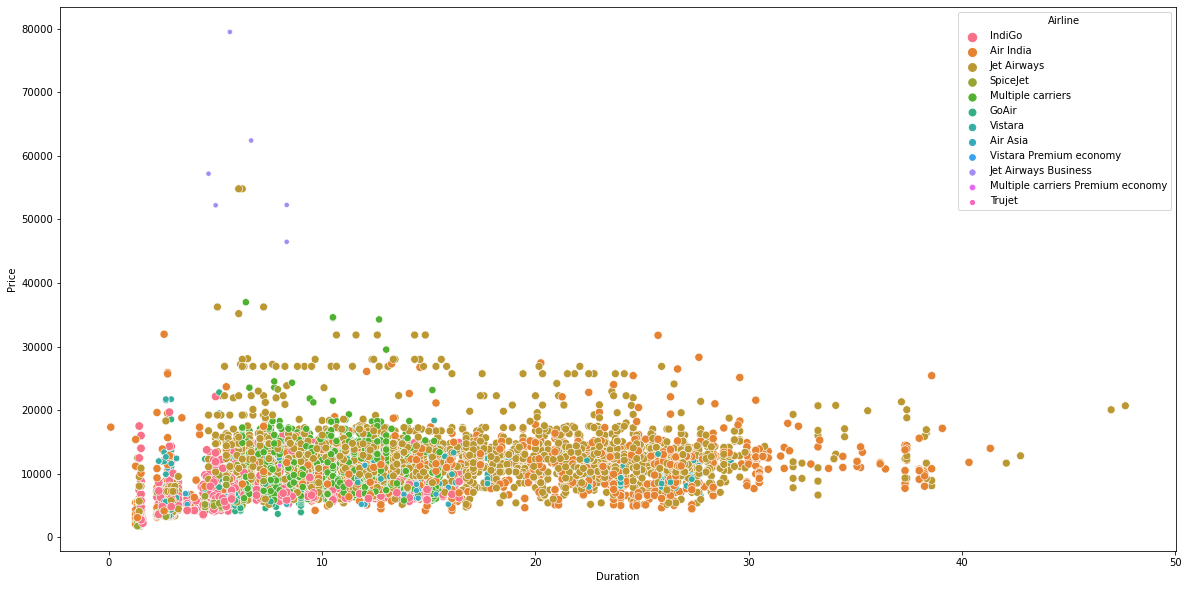

In [39]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Duration",y="Price",hue='Airline',size='Airline',data=df_flight)
plt.show()

In [40]:
df_flight

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,type,month,day
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2.83,0,No info,3897.00,train,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2,No info,7662.00,train,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2,No info,13882.00,train,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1,No info,6218.00,train,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1,No info,13302.00,train,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23.92,1,No info,NaN,test,6,6
13350,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2.58,0,No info,NaN,test,3,27
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6.58,1,No info,NaN,test,6,3
13352,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15.25,1,No info,NaN,test,6,3


# Seperating the dataset back to train and test 

In [41]:
#Separating test and train data
df_train=df_flight.loc[df_flight["type"]=="train"]
df_test=df_flight.loc[df_flight["type"]=="test"]

In [42]:
#Dropping the type column
df_test.drop(columns=["type"],inplace=True)
df_train.drop(columns=["type"],inplace=True)

In [43]:
df_test.reset_index(drop=True,inplace=True)
df_test.drop(columns=["Price"],inplace=True)
df_test

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,month,day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10.92,1,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4.00,1,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23.75,1,In-flight meal not included,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13.00,1,No info,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2.83,0,No info,6,24
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23.92,1,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2.58,0,No info,3,27
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6.58,1,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15.25,1,No info,6,3


In [44]:
df_train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2.83,0,No info,3897.00,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.42,2,No info,7662.00,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2,No info,13882.00,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.42,1,No info,6218.00,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4.75,1,No info,13302.00,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2.50,0,No info,4107.00,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2.58,0,No info,4145.00,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3.00,0,No info,7229.00,4,27
10681,Vistara,Banglore,Delhi,BLR → DEL,11:30,14:10,2.67,0,No info,12648.00,1,3


In [45]:
numerics_var = ['float64', 'int64']
numeric_df = df_train.select_dtypes(include=numerics_var)
objects_df = df_train.select_dtypes(exclude=numerics_var)

In [46]:
objects_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,1,No info
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,0,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,0,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,0,No info
10681,Vistara,Banglore,Delhi,BLR → DEL,11:30,14:10,0,No info


# Label Encoder

In [47]:
# categorical variable encoding
cat_vars_list = objects_df.columns.tolist()
## Label Encoder
le = LabelEncoder()
for i in cat_vars_list :
    df_train[i] = le.fit_transform(df_train[i])

In [48]:
df_train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,3,0,2,18,211,233,2.83,0,7,3897.00,3,24
1,1,3,0,84,31,906,7.42,2,7,7662.00,1,5
2,4,2,1,118,70,413,19.00,2,7,13882.00,9,6
3,3,3,0,91,164,1324,5.42,1,7,6218.00,12,5
4,3,0,2,29,149,1237,4.75,1,7,13302.00,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,1259,2.50,0,7,4107.00,9,4
10679,1,3,0,64,193,1305,2.58,0,7,4145.00,4,27
10680,4,0,2,18,58,824,3.00,0,7,7229.00,4,27
10681,10,0,2,18,92,938,2.67,0,7,12648.00,1,3


# Correlation between the target variable and independent variable

In [49]:
# checking the correlation of features and labels
corr = df_train.corr()
corr

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
Airline,1.00,-0.01,0.07,0.03,-0.04,-0.02,-0.16,-0.20,-0.08,-0.04,-0.01,0.03
Source,-0.01,1.00,-0.43,0.40,0.06,0.02,0.16,0.19,-0.02,0.02,0.06,0.01
Destination,0.07,-0.43,1.00,-0.23,-0.08,-0.06,-0.38,-0.42,0.06,-0.26,-0.07,0.01
Route,0.03,0.40,-0.23,1.00,-0.08,0.01,0.29,0.46,0.04,0.16,0.04,0.10
Dep_Time,-0.04,0.06,-0.08,-0.08,1.00,-0.02,-0.00,-0.07,-0.05,0.00,0.03,-0.00
Arrival_Time,-0.02,0.02,-0.06,0.01,-0.02,1.00,0.06,0.05,0.02,0.03,-0.00,0.00
Duration,-0.16,0.16,-0.38,0.29,-0.00,0.06,1.00,0.74,-0.15,0.51,0.06,-0.04
Total_Stops,-0.20,0.19,-0.42,0.46,-0.07,0.05,0.74,1.00,-0.07,0.60,0.07,-0.02
Additional_Info,-0.08,-0.02,0.06,0.04,-0.05,0.02,-0.15,-0.07,1.00,-0.06,-0.00,-0.02
Price,-0.04,0.02,-0.26,0.16,0.00,0.03,0.51,0.60,-0.06,1.00,0.01,-0.17


<AxesSubplot:>

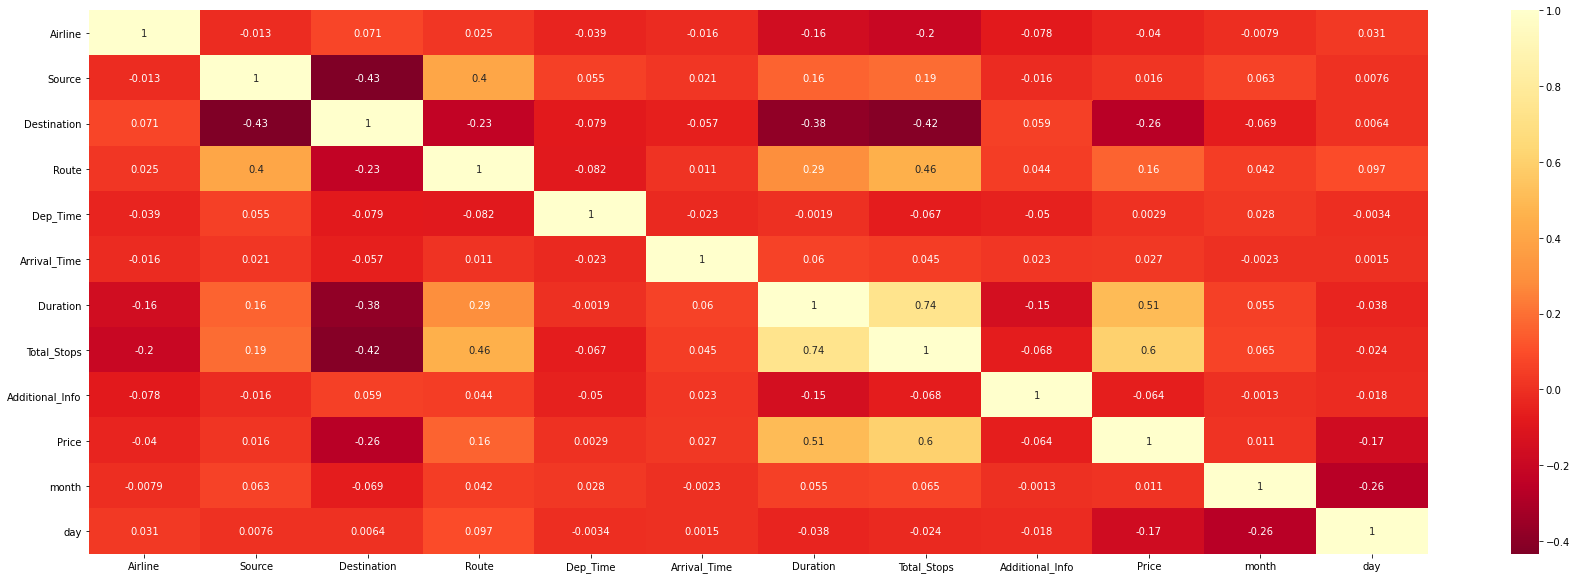

In [50]:
# Heat Map
plt.figure(figsize=(30,10))
sns.heatmap(corr,cmap='YlOrRd_r', annot=True)

- All the variables is categorical variables.
- Corr of cat variables is not least important which is not effecting model performance.
- Only target col-Price is continous
- Corr is less significant in cat variables.

# Skewness Detection:

In [51]:
df_train.skew()

Airline            0.73
Source            -0.42
Destination        0.85
Route             -0.50
Dep_Time           0.20
Arrival_Time      -0.61
Duration           0.86
Total_Stops        0.32
Additional_Info   -2.11
Price              1.81
month              0.63
day                0.37
dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

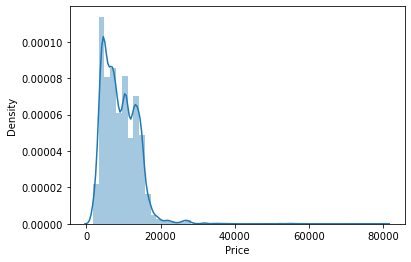

In [52]:
sns.distplot(df_train['Price'])

- Only Target col is continous which is Right skewed data.

Airline            0.73
Source            -0.42
Destination        0.85
Route             -0.50
Dep_Time           0.20
Arrival_Time      -0.61
Duration           0.86
Total_Stops        0.32
Additional_Info   -2.11
Price              0.43
month              0.63
day                0.37
dtype: float64

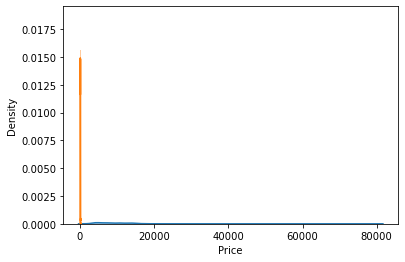

In [53]:
import numpy as np
sns.distplot(df_train['Price'])
df_train['Price']=np.sqrt(df_train['Price'])
sns.distplot(df_train['Price'])
df_train.skew()

- Skewness is reduced to normal range with sqrt method where the value falls between +0.5 to -0.5 range.

# Boxplot for Outliers Detection:

<AxesSubplot:>

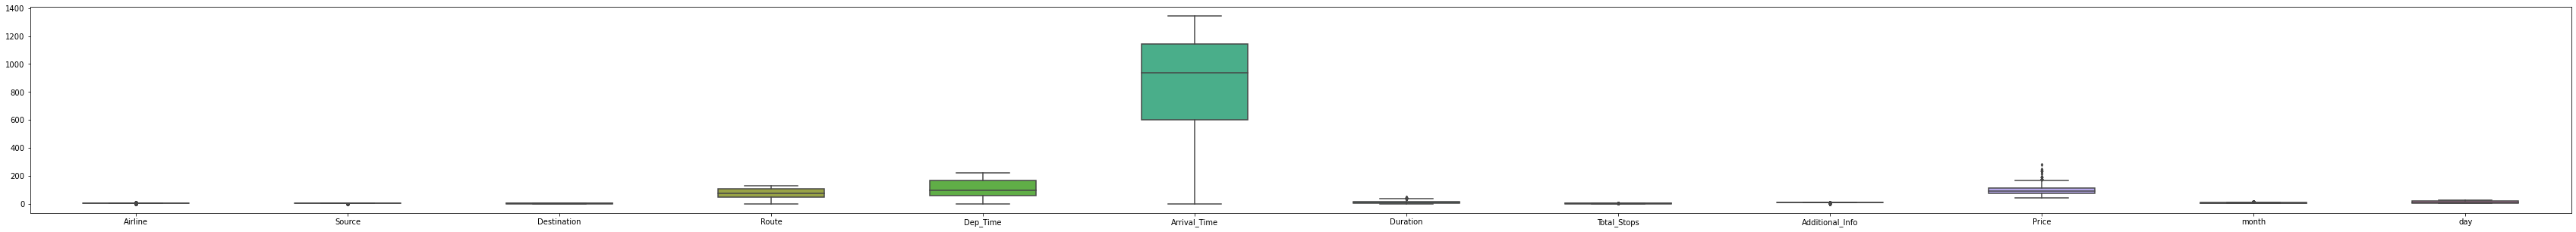

In [54]:
fig, ax =plt.subplots(figsize=(60,5))
sns.boxplot(data=df_train, width = 0.5,ax=ax, fliersize=3)

# Dividing Dataset into Independent Variables(x) & Target Variable(y)

In [55]:
x=df_train.drop("Price",axis=1)
y=df_train["Price"]

- x-Independent Variables.
- y-Target Variable(Wins)

In [56]:
x.shape, y.shape

((10683, 11), (10683,))

In [57]:
x.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,month,day
0,3,0,2,18,211,233,2.83,0,7,3,24
1,1,3,0,84,31,906,7.42,2,7,1,5
2,4,2,1,118,70,413,19.00,2,7,9,6
3,3,3,0,91,164,1324,5.42,1,7,12,5
4,3,0,2,29,149,1237,4.75,1,7,1,3


In [58]:
y.head()

0    62.43
1    87.53
2   117.82
3    78.85
4   115.33
Name: Price, dtype: float64

# Standard Scaler

In [59]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables
x

array([[-0.41067545, -1.65844074,  0.81510669, ...,  0.49861987,
        -0.84850298,  1.28563248],
       [-1.26099927,  0.89005213, -1.15944768, ...,  0.49861987,
        -1.5179928 , -0.8726517 ],
       [ 0.01448647,  0.04055451, -0.17217049, ...,  0.49861987,
         1.15996647, -0.7590578 ],
       ...,
       [ 0.01448647, -1.65844074,  0.81510669, ...,  0.49861987,
        -0.51375808,  1.62641419],
       [ 2.56545795, -1.65844074,  0.81510669, ...,  0.49861987,
        -1.5179928 , -1.09983951],
       [-1.26099927,  0.04055451, -0.17217049, ...,  0.49861987,
         1.15996647, -0.8726517 ]])

- As the all object col is label encoded where the values are not in same range so the sclaing is applied on independent variables 

# Model building & Predicting on Train data.

In [60]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

3.8270840474224084 at random_state 0
3.61146961848181 at random_state 1
3.798529292180384 at random_state 2
3.678146611012482 at random_state 3
3.777431478941791 at random_state 4
3.998474395138811 at random_state 5
3.979424776366548 at random_state 6
3.4722372551093312 at random_state 7
3.8093019781816815 at random_state 8
3.7475093051589536 at random_state 9
3.7321903619024734 at random_state 10
3.9667800363111465 at random_state 11
3.9615819197012363 at random_state 12
3.8232385489299316 at random_state 13
3.806710099170503 at random_state 14
3.683415762147648 at random_state 15
3.9457838801249054 at random_state 16
3.816454242382793 at random_state 17
3.789476105371165 at random_state 18
3.872720803286876 at random_state 19
3.8457137663583336 at random_state 20
3.700085410519447 at random_state 21
3.576917060292697 at random_state 22
3.85911199759912 at random_state 23
3.9417563095231114 at random_state 24
3.9176056917317656 at random_state 25
3.94739621912383 at random_state 26
4.

In [61]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  4.172317679510356  on Random_state  74


- Best Random state selected is 74 with MAE = 4.16.

# Splitting Training Set & Test Set.

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 74)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.

# Linear Regression

In [63]:
# Applying linear regression on train and test data
lm = LinearRegression()
lm.fit(x_train,y_train) 
pred=lm.predict(x_test) 

In [64]:
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) 
# Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))

Mean Absolute error:  12.79483815552296
Mean Squared error:  286.65744979498197
Root Mean Squared Error: 16.930961277936404
r2_score : 0.496944897361436


In [65]:
# how well the model learned
lm.score(x_train,y_train)

0.5084552873582959

- Score of Linear Reg is 50.1% & MAE = 9.9, R2 Score is 0.609.

# Decision Tree Regression

In [66]:
# Applying Decision Tree Regression on train and test data
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred = DTR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
DTR.score(x_train,y_train) 

Mean Absolute error:  4.236148797210977
Mean Squared error:  100.93141566520323
Root Mean Squared Error: 10.046462843469
r2_score : 0.8228754783689449


0.9963374531475669

- DTR learned the model with 99.6%.
- DTR MAE = 4.2, R2 Score is 0.83.

# Random Forest Regression

In [67]:
# Applying Random Forest Regression on train and test data
RFR = RandomForestRegressor() 
RFR.fit(x_train, y_train) 
pred = RFR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
RFR.score(x_train,y_train)

Mean Absolute error:  3.6779441618853337
Mean Squared error:  63.366076415166305
Root Mean Squared Error: 7.960281176891072
r2_score : 0.888798884879382


0.9868463014890538

- RFR also learned the model well with 98.7%

# Support Vector Regression

In [68]:
# Applying Support Vector Regression on train and test data
SV = SVR()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
SV.score(x_train,y_train)

Mean Absolute error:  9.909414472557923
Mean Squared error:  222.46534299060744
Root Mean Squared Error: 14.915272139341187
r2_score : 0.609595613050687


0.6553737543381142

- SVR has MAE = 9.9
- SVR has learned the model with 65.5%  .

# XGBoost Regression

In [69]:
# Applying XGBoost Regression on train and test data
XGBR = XGBRegressor() 
XGBR.fit(x_train,y_train) 
pred = XGBR.predict(x_test)
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
XGBR.score(x_train,y_train) 

Mean Absolute error:  4.020368525728346
Mean Squared error:  55.07745850080255
Root Mean Squared Error: 7.421418900776492
r2_score : 0.9033445788378827


0.9737936427830612

- XGBR has learned the model with 97.3% .

# K-fold Cross Validation

In [70]:
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p
cross_validation=KFold(5, shuffle =True)

In [71]:
# Linear Regression 
print(cross_val_score(lm,x,y,cv=cross_validation).mean()) 

0.5045936670458981


In [72]:
# DTR Regression
print(cross_val_score(DTR,x,y,cv=cross_validation).mean()) 

0.878398796712289


In [73]:
# Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=cross_validation).mean()) 

0.9169997269747812


In [74]:
# Support Vector Regressor
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) 

0.6421284798895


In [75]:
#  XGBoost Regressor
print(cross_val_score(XGBR,x,y,cv=cross_validation).mean()) 

0.9282947844291478


# Best Model Selection
I have selected XGBoost Regressor (XGBR) as the best model as CV score is high.

# Hyperparameter & GridsearchCV

In [76]:
#Setting Random Forest Hyperparameter
import numpy as np
parameter = {'eta': [0.01,0.02],
             'max_depth': np.arange(2,10),
             'subsample': [0,1],
             'colsample_bytree': [0,1],
             'n_estimators': [10]}

In [77]:
#Creating Gridserach CV Instance
GCV=GridSearchCV(XGBRegressor(),parameter,cv=cross_validation)
GCV.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weig...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg

- Applying XGBR-Gridsearch to training set with parameters.

In [78]:
GCV.best_params_

{'colsample_bytree': 1,
 'eta': 0.02,
 'max_depth': 6,
 'n_estimators': 10,
 'subsample': 1}

In [79]:
Final_mod = XGBRegressor(colsample_bytree = 1, eta= 0.02, max_depth = 7,n_estimators = 10, subsample = 1)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
XGBR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  74.7277339041263
Mean Squared error:  6007.887236199506
Root Mean Squared Error: 77.51056209446237
-9.543240136995623


0.9737936427830612

# Model building & Predicting on Test data

In [80]:
z = df_test
z

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,month,day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10.92,1,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4.00,1,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23.75,1,In-flight meal not included,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13.00,1,No info,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2.83,0,No info,6,24
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23.92,1,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2.58,0,No info,3,27
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6.58,1,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15.25,1,No info,6,3


In [81]:
## Label Encoder
le = LabelEncoder()
for i in cat_vars_list :
    z[i] = le.fit_transform(z[i])
z

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,month,day
0,4,2,1,76,138,150,10.92,1,5,6,6
1,3,3,0,65,31,353,4.00,1,5,12,5
2,4,2,1,76,156,566,23.75,1,3,5,21
3,6,2,1,76,48,633,13.00,1,5,5,21
4,0,0,2,16,198,135,2.83,0,5,6,24
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,170,617,23.92,1,5,6,6
2667,3,3,0,43,106,507,2.58,0,5,3,27
2668,4,2,1,76,183,151,6.58,1,5,6,3
2669,1,2,1,76,11,577,15.25,1,5,6,3


In [93]:
z.shape

(2671, 11)

In [94]:
y.shape

(2671,)

In [84]:
y.drop(y.index[2671:10683], inplace = True)
y

0       62.43
1       87.53
2      117.82
3       78.85
4      115.33
        ...  
2666   115.93
2667    69.31
2668   107.90
2669    58.47
2670    78.12
Name: Price, Length: 2671, dtype: float64

- The number of rows in target y is dropped to make it equal to z which is test set dataframe for model building.
- All the above command is used to make number of rows of target equal to test set z.

In [95]:
for i in range(200):
    z_train, z_test, y_train, y_test = train_test_split(z,y, test_size=0.33, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(z_train, y_train)
    pred=DTR.predict(z_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

27.1142673917969 at random_state 0
28.570348237579235 at random_state 1
27.190308851324115 at random_state 2
27.934566483634892 at random_state 3
26.433141122059965 at random_state 4
28.052683742746414 at random_state 5
27.64354137182366 at random_state 6
28.11360629126031 at random_state 7
27.88456637236342 at random_state 8
28.257371798860905 at random_state 9
28.84310476776926 at random_state 10
28.109413994451696 at random_state 11
27.102553020714396 at random_state 12
28.309835866822358 at random_state 13
27.40656169877348 at random_state 14
27.025036042754827 at random_state 15
27.649072600865132 at random_state 16
27.72080832908001 at random_state 17
26.278928770905274 at random_state 18
28.45377545603353 at random_state 19
27.854012002361426 at random_state 20
27.212242052640878 at random_state 21
27.24503965416339 at random_state 22
27.874483533389352 at random_state 23
25.89871195065891 at random_state 24
27.912061955725484 at random_state 25
27.42653428452575 at random_state

In [86]:
leastMAE=0
mazRS=0
for i in range(1,200):
    z_train, z_test, y_train, y_test = train_test_split(z,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(z_train, y_train)
    pred = DTR.predict(z_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        mazRS=i
print("Least MAE ", leastMAE," on Random_state ",mazRS)

Least MAE  29.30780724280474  on Random_state  193


In [96]:
z_train, z_test, y_train, y_test = train_test_split(z,y,test_size=0.30, random_state = 193)

In [97]:
# Applying linear Reg 
lm = LinearRegression() 
lm.fit(z_train,y_train) 
pred=lm.predict(z_test) 
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :', r2_score(y_test,pred))
lm.score(z_train,y_train) # how well the model learned

Mean Absolute error:  20.364050233886033
Mean Squared error:  596.1337452212354
Root Mean Squared Error: 24.41585028667311
r2_score : -0.005085128689860996


0.005306195954316806

In [100]:
# Applying Decision Tree Regression
DTR = DecisionTreeRegressor()
DTR.fit(z_train, y_train)
pred = DTR.predict(z_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
DTR.score(z_train,y_train) # how well the model learned

Mean Absolute error:  29.504343900964194
Mean Squared error:  1372.0876012701606
Root Mean Squared Error: 37.041700842026145
r2_score : -1.3133480604836212


0.9940110918331647

In [101]:
# Applying Random Forest Regression
RFR = RandomForestRegressor()  
RFR.fit(z_train, y_train) 
pred = RFR.predict(z_test) 
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))  
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
RFR.score(z_train,y_train) # how well the model learned

Mean Absolute error:  22.047534869758277
Mean Squared error:  714.4024953261362
Root Mean Squared Error: 26.728308875163357
r2_score : -0.20448696237578767


0.8322241474272747

In [102]:
# Applying Support Vector Regression
SV = SVR() 
SV.fit(z_train, y_train)
pred = SV.predict(z_test) 
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
SV.score(z_train,y_train)# how well the model learned

Mean Absolute error:  20.322923785776506
Mean Squared error:  597.7359897729597
Root Mean Squared Error: 24.44863983482434
r2_score : -0.00778652277193026


-0.0005745492159143772

In [103]:
# Applying ZGB Regression
XGBR = XGBRegressor() 
XGBR.fit(z_train,y_train) 
pred = XGBR.predict(z_test)
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
XGBR.score(z_train,y_train) # how well the model learned   

Mean Absolute error:  23.379053532050524
Mean Squared error:  827.3673246714048
Root Mean Squared Error: 28.763993545253843
r2_score : -0.3949463533263553


0.7922485310574925

# K-fold Cross Validation

In [104]:
# Linear Regression
print(cross_val_score(lm,z,y,cv=cross_validation).mean())

-0.005360869677722957


In [105]:
# DTR Regression
print(cross_val_score(DTR,z,y,cv=cross_validation).mean()) 

-1.1944514636477503


In [106]:
# Random Forest Regressor
print(cross_val_score(RFR,z,y,cv=cross_validation).mean()) 

-0.1706578737375093


In [107]:
# Support Vector
print(cross_val_score(SV,z,y,cv=cross_validation).mean())

-0.010642600004159907


In [108]:
#  zGBoost Regressor
print(cross_val_score(XGBR,z,y,cv=cross_validation).mean())

-0.351790156677443


# Best Model:
I have selected RFR as the best model.

In [109]:
import numpy as np
parameter = {'max_depth': np.arange(2,8),
             'max_features': ['log2','sqrt','auto'],
             'min_samples_leaf': [1,2],
             'n_estimators': [10]}

In [110]:
# Creating Grid Search CV Object and Applying GridSearch on best Model - RFR
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=cross_validation)
GCV.fit(z_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2], 'n_estimators': [10]})

In [111]:
# Giving the Best Gridserach Parameters
GCV.best_params_ 

{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 10}

In [112]:
Final_mod = RandomForestRegressor(max_depth = 3, max_features = 'auto', min_samples_leaf = 1,n_estimators= 10)
Final_mod.fit(z_train, y_train)
pred = Final_mod.predict(z_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
RFR.score(z_train,y_train) # how well the model learned

Mean Absolute error:  20.5056811870323
Mean Squared error:  604.3544721536081
Root Mean Squared Error: 24.583622030807586
-0.01894532441436514


0.8322241474272747

- The final model has learned witha score of 83%.

# Exporting Model with Joblib Library

In [113]:
# Model is exported as .pkl file with the help of joblib library.
import joblib
joblib.dump(Final_mod,"FlightModel.pkl")

['FlightModel.pkl']